<h1 align="center">Introduction</h1>In this kernel, i have tried to introduce various machine learning models and their implementation. The sole perpose of this kernel is to correctly identify the presence of any heart disease based on the given input. We proceed by giving a general introduction towards the disease followed by dataset's attributes and what they resemble. As we descend down the kernel , i have used various Machine Learning and Deep Learning approach. 


Note:- This Kernel is subject to get updated as soon as i find something which can be revelant to the context.

<h1>About Heart Disease</h1>Heart disease is a general term that means that the heart is not working normally. Babies can be born with heart disease. This is called congenital heart disease. If people get heart disease later, it is called acquired heart disease. Most heart disease is acquired.
The three most common types of acquired heart disease are:

<li><b>Coronary Artery Disease (acronym CAD)</b></li> 
<li><b>Congestive Heart Failure (CHF)</b></li>
<li><b>Bad Heart Rhythms</b></li>

<h3>DEATHS</h3>
<p>Heart disease is the biggest killer of both men and women in the United States, England, Wales, and Canada. For example, heart disease causes 4 out of every 10 deaths in the United States.This is more than all kinds of cancer put together. Also, one person dies of heart disease about every minute in the United States alone.</p>

<b> Loading common dependencies </b>

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("./data"))
import warnings
warnings.filterwarnings("ignore")
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections

# Deep Learning Libraries
from keras.models import Sequential
from keras.layers import Dense,Dropout

# Misc. Libraries
from imblearn.datasets import fetch_datasets
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import confusion_matrix,f1_score,precision_score,recall_score,accuracy_score
import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
import matplotlib.pyplot as plt

['heart.csv', 'heart-disease-uci.zip']


<b>Going through the dataset, first impression </b>

Loading the dataset

In [5]:
data=pd.read_csv("./data/heart.csv")

In [6]:
print('Heart Disease', round(data['target'].value_counts()[1]/len(data) * 100,2), '% of the target ')
print('No heart Disease', round(data['target'].value_counts()[0]/len(data) * 100,2), '% of the target')

Heart Disease 54.46 % of the target 
No heart Disease 45.54 % of the target


We see that the Heart disease occured 54.3 % of the times in the dataset, whilst the 45.7% were the no heart disease. So, we need to balance the dataset otherwise it might get overfit. This will help the model to find pattern in the dataset which contributes to the heart disease and which doesn't.

Text(0.5, 1.0, 'Class Distributions \n 0: No Disease || 1: Disease')

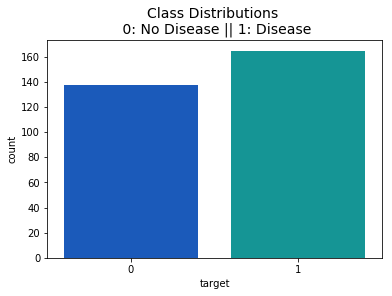

In [7]:
sns.countplot('target', data=data, palette="winter")
plt.title('Class Distributions \n 0: No Disease || 1: Disease', fontsize=14)


In [8]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<h1> Attributes and what does they resemble </h1>
* **age**: Age of patient
* **sex**:Sex, 1 for male
* **cp**:chest pain
* **trestbps**:resting blood pressure,more than 120 over 80 and less than 140 over 90 (120/80-140/90): You have a normal blood pressure reading but it is a little higher than it should be, and you should try to lower it. Make healthy changes to your lifestyle.
* **chol**:serum cholesterol,shows the amount of triglycerides present. Triglycerides are another lipid that can be measured in the blood. 
* **fbs**:fasting blood sugar larger 120mg/dl (1 true),less than 100 mg/dL (5.6 mmol/L) is normal,100 to 125 mg/dL (5.6 to 6.9 mmol/L) is considered prediabetes
* **rest**:ecg resting electrode.
* **thalach**:maximum heart rate achieved, maximum heart rate is 220 minus your age.
* **exang**:exercise induced angina (1 yes),Angina is a type of chest pain caused by reduced blood flow to the heart.Angina is a symptom of coronary artery disease.
* **oldpeak**: ST depression induced by exercise relative to rest
* **slope**:slope of peak exercise ST
* **ca**:number of major vessel
* **thal**:no explanation provided, but probably thalassemia (3 normal; 6 fixed defect; 7 reversable defect)
* **result**:(1 anomality)	num	diagnosis of heart disease (angiographic disease status)

<b>Distribution:</b> Checking how the attribute values are distributed and determining their skewness

In [9]:
sns.set(style="white", palette="PuBuGn_d", color_codes=True)

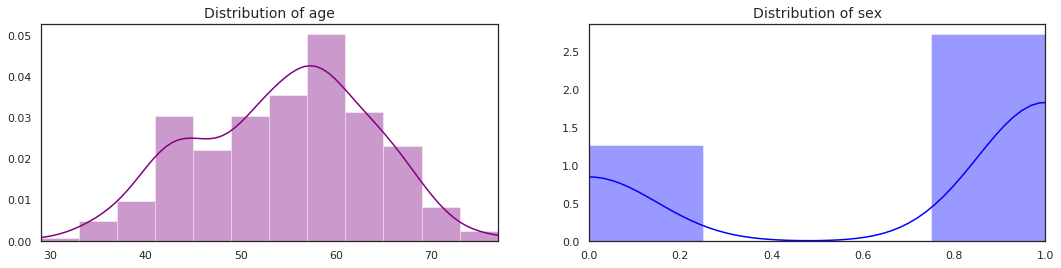

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))
age = data['age'].values
sex = data['sex'].values
sns.distplot(age, ax=ax[0], color='purple')
ax[0].set_title('Distribution of age', fontsize=14)
ax[0].set_xlim([min(age), max(age)])
sns.distplot(sex, ax=ax[1], color='b')
ax[1].set_title('Distribution of sex', fontsize=14)
ax[1].set_xlim([min(sex), max(sex)])
plt.show()


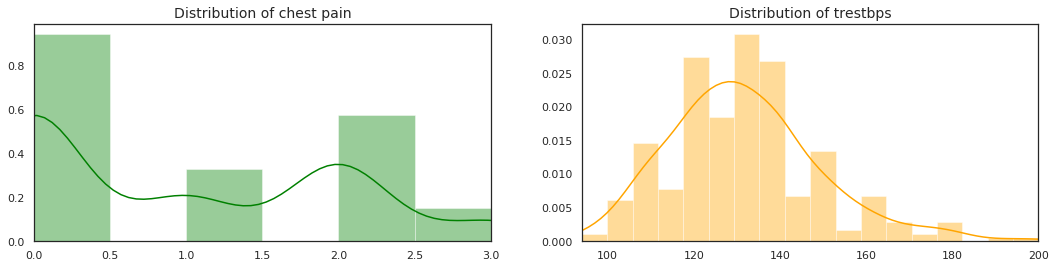

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))
cp = data['cp'].values
trestbps = data['trestbps'].values
sns.distplot(cp, ax=ax[0], color='green')
ax[0].set_title('Distribution of chest pain', fontsize=14)
ax[0].set_xlim([min(cp), max(cp)])
sns.distplot(trestbps, ax=ax[1], color='orange')
ax[1].set_title('Distribution of trestbps', fontsize=14)
ax[1].set_xlim([min(trestbps), max(trestbps)])
plt.show()


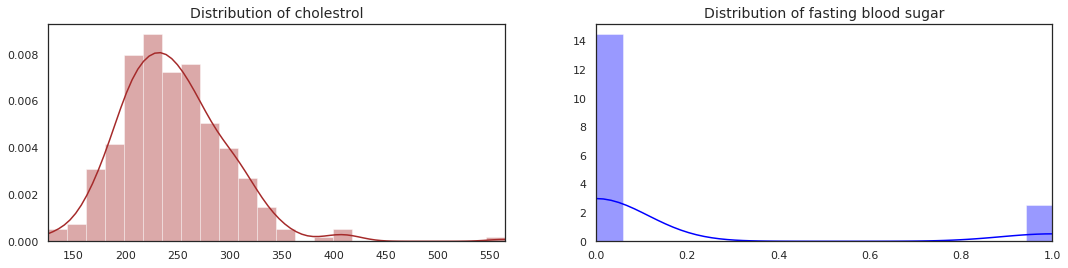

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))
chol = data['chol'].values
fbs = data['fbs'].values
sns.distplot(chol, ax=ax[0], color='brown')
ax[0].set_title('Distribution of cholestrol', fontsize=14)
ax[0].set_xlim([min(chol), max(chol)])
sns.distplot(fbs, ax=ax[1], color='blue')
ax[1].set_title('Distribution of fasting blood sugar', fontsize=14)
ax[1].set_xlim([min(fbs), max(fbs)])
plt.show()


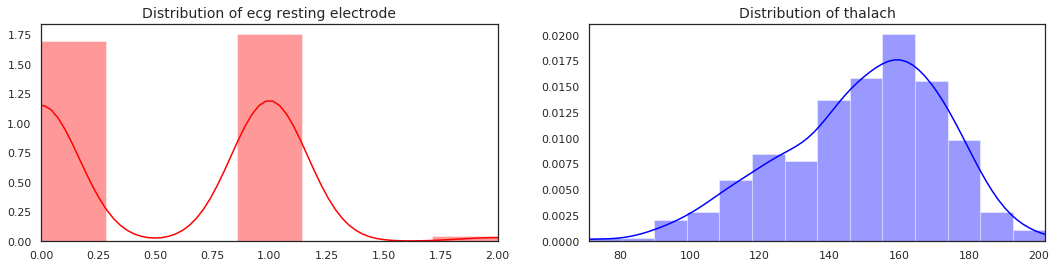

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))
restecg = data['restecg'].values
thalach = data['thalach'].values
sns.distplot(restecg,ax=ax[0], color='r')
ax[0].set_title('Distribution of ecg resting electrode', fontsize=14)
ax[0].set_xlim([min(restecg), max(restecg)])
sns.distplot(thalach, ax=ax[1], color='b')
ax[1].set_title('Distribution of thalach', fontsize=14)
ax[1].set_xlim([min(thalach), max(thalach)])
plt.show()


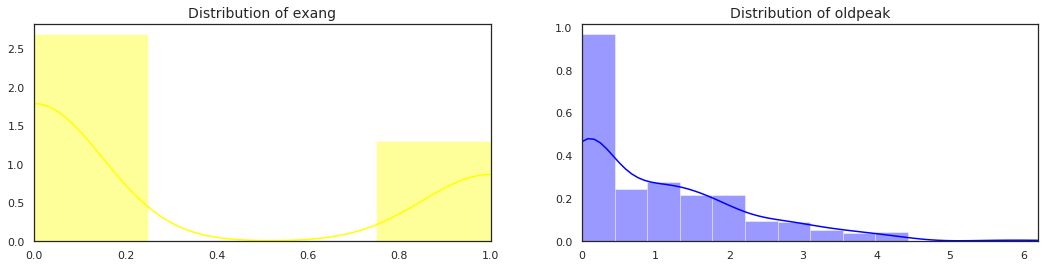

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))
exang = data['exang'].values
oldpeak = data['oldpeak'].values
sns.distplot(exang,ax=ax[0], color='yellow')
ax[0].set_title('Distribution of exang', fontsize=14)
ax[0].set_xlim([min(exang), max(exang)])
sns.distplot(oldpeak, ax=ax[1], color='b')
ax[1].set_title('Distribution of oldpeak', fontsize=14)
ax[1].set_xlim([min(oldpeak), max(oldpeak)])
plt.show()


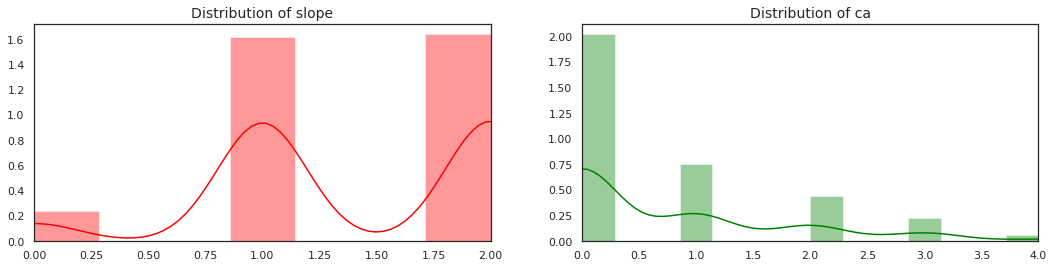

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))
slope = data['slope'].values
ca = data['ca'].values
sns.distplot(slope,ax=ax[0], color='red')
ax[0].set_title('Distribution of slope', fontsize=14)
ax[0].set_xlim([min(slope), max(slope)])
sns.distplot(ca, ax=ax[1], color='green')
ax[1].set_title('Distribution of ca', fontsize=14)
ax[1].set_xlim([min(ca), max(ca)])
plt.show()


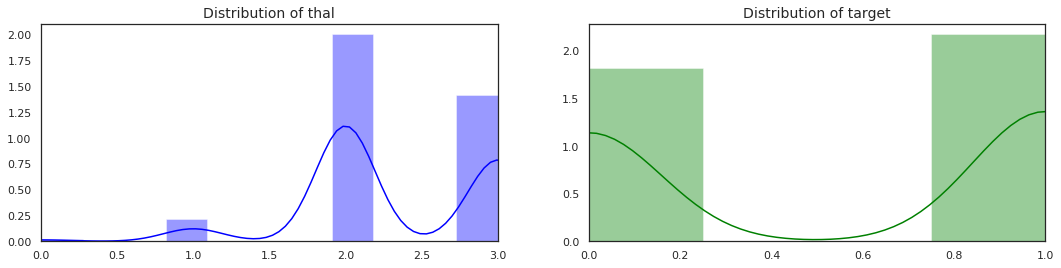

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))
thal = data['thal'].values
target = data['target'].values
sns.distplot(thal,ax=ax[0], color='blue')
ax[0].set_title('Distribution of thal', fontsize=14)
ax[0].set_xlim([min(thal), max(thal)])
sns.distplot(target, ax=ax[1], color='green')
ax[1].set_title('Distribution of target', fontsize=14)
ax[1].set_xlim([min(target), max(target)])
plt.show()


<h1> Getting Insight <h1>

In [17]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


**Checking for null values**

In [18]:
data.isnull().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

No null values

Counting the total target values in each class

In [19]:
data.target.value_counts()

1    165
0    138
Name: target, dtype: int64

Checking for the existence of any duplicate values.
The duplicates should be tackled down safely,otherwise would affect in generalization of the model.There might be a chance if duplicates are not dealt properly, they might show up in the test dataset which are also in the training dataset. 

In [20]:
data[data.duplicated()==True]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [21]:
data.drop_duplicates(inplace=True)
data[data.duplicated()==True]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


<h1><b> Checking the gender distribution </b> </h1>

<li>0 resembles Female</li>
<li>1 resembles Male</li>

Male   : 206
Female : 96


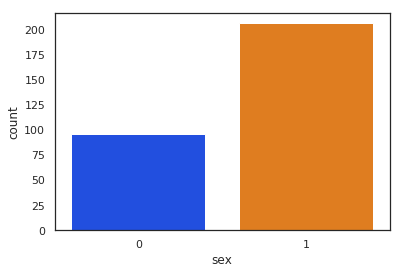

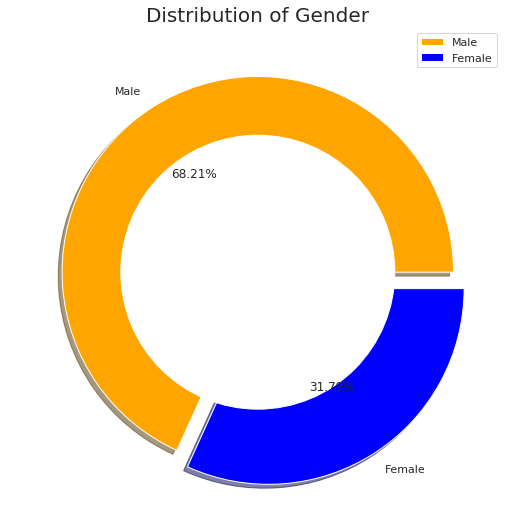

In [22]:
male=data.sex.value_counts()[1]
female=data.sex.value_counts()[0]
print("Male   :",male)
print("Female :", female)
sns.countplot(x="sex",data=data,palette="bright")
plt.show()

fig = plt.Circle((0, 0), 0.7, color = 'white')
plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(data.sex.value_counts(), colors = ["orange","blue"], labels = ["Male","Female"], shadow = True, explode = (0,0.1), autopct = '%.2f%%')
plt.title('Distribution of Gender', fontsize = 20)
p = plt.gcf()
p.gca().add_artist(fig)
plt.legend()
plt.show()


>Researchers found that throughout life, men were about twice as likely as women to have a heart attack. That higher risk persisted even after they accounted for traditional risk factors for heart disease, including high cholesterol, high blood pressure, diabetes, body mass index, and physical activity.
https://www.health.harvard.edu/heart-health/throughout-life-heart-attacks-are-twice-as-common-in-men-than-women

<h1> Age Distribution </h1>
<b> Which age is prone to get affected by heart disease <b>


[]

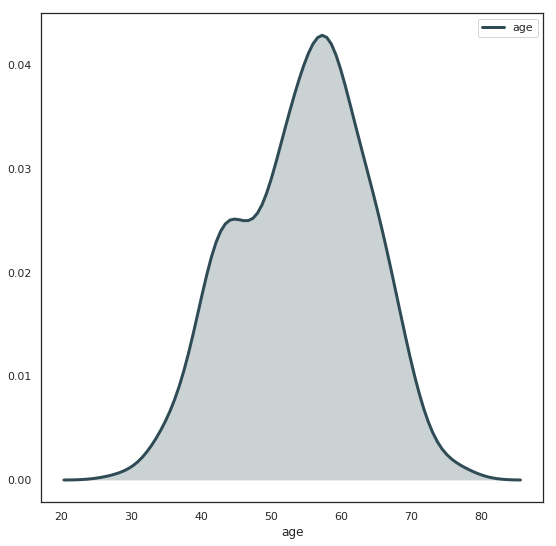

In [23]:
#What age people get heart disease
sns.distplot(data.age, hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = "age")
plt.plot()

We see from the distribution that age between 50-60 is mostly likely to have the heart related disease and the average age to get affected is at age 55

<h1> Finding which attribute contributes to the heart disease </h1>

In [24]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


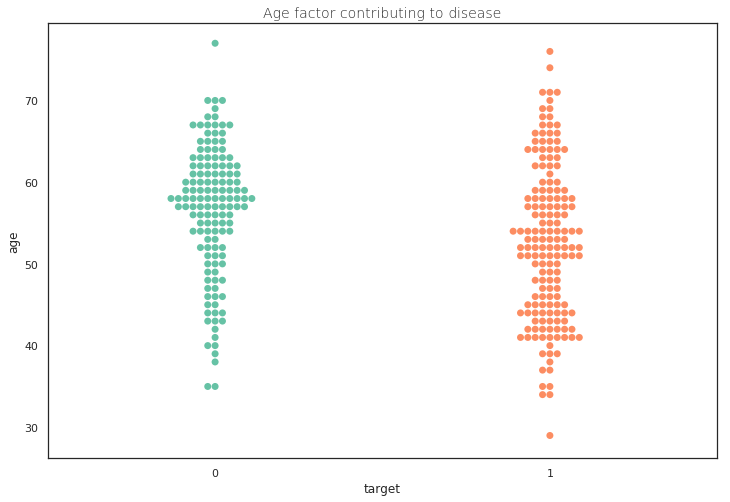

In [25]:
plt.rcParams['figure.figsize'] = (12, 8)
sns.swarmplot(data['target'], data['age'], palette = 'Set2', size = 7)
plt.title('Age factor contributing to disease', fontsize = 14, fontweight = 25)
plt.show()

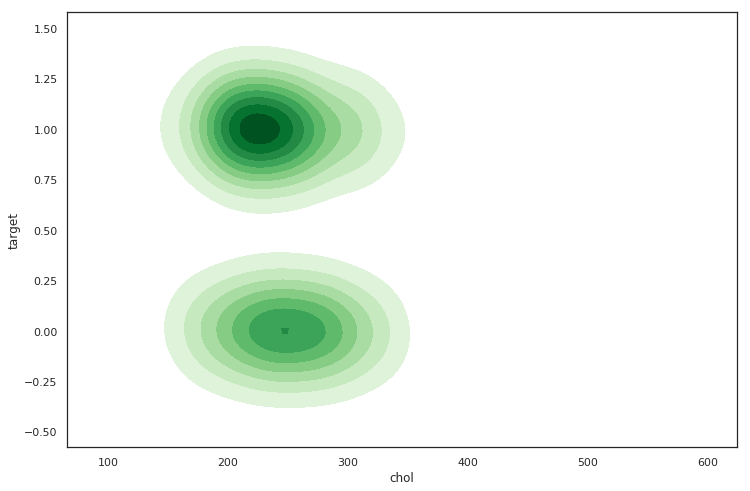

In [26]:
ax=sns.kdeplot(data.chol, data.target,cmap="Greens", shade=True, shade_lowest=False)

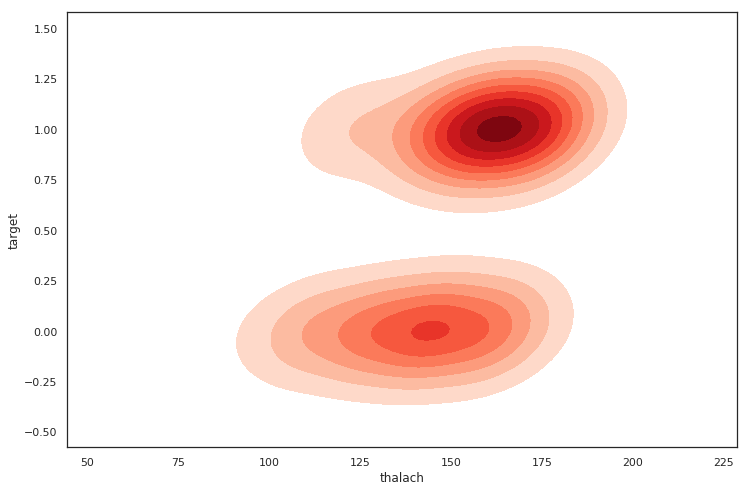

In [27]:
#fbs
ax=sns.kdeplot(data.thalach, data.target,cmap="Reds", shade=True, shade_lowest=False)

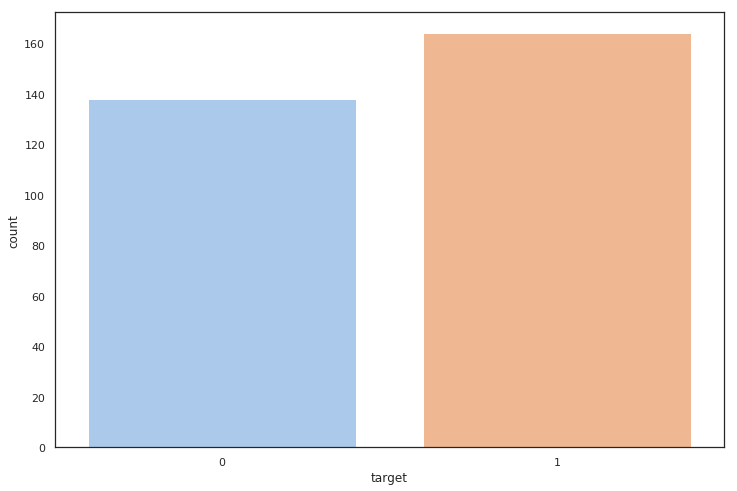

In [28]:
sns.countplot(x="target",data=data,palette="pastel")
plt.show()

In [29]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=20)


**The Model**

Using Random Forest and then using GridSearch CV to find the best parameter


In [31]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100,max_depth=5)
model.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [32]:
Y_pred=model.predict(X_test)
accuracy=accuracy_score(Y_test,Y_pred)
accuracy

0.8524590163934426

In [33]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':[1,500], 'max_depth':[1, 15]}
clf = GridSearchCV(model, parameters, cv=5)
clf.fit(X_train,Y_train)
print(clf.best_params_)

{'n_estimators': 500, 'max_depth': 1}



Using the parameter achieved from the GridSearch to 

In [34]:
model = RandomForestClassifier(n_estimators=500,max_depth=1)
model.fit(X_train, Y_train)
Y_pred=model.predict(X_test)
cm=confusion_matrix(Y_test.tolist(),Y_pred.tolist())
print("Accuracy:",accuracy_score(Y_test,Y_pred))
print("Precision Score :",precision_score(Y_test,Y_pred))
print("f1 Score :",f1_score(Y_test,Y_pred))
print("Confusion Matrix: \n",cm)


Accuracy: 0.8852459016393442
Precision Score : 0.9428571428571428
f1 Score : 0.904109589041096
Confusion Matrix: 
 [[21  2]
 [ 5 33]]


In [35]:
total=sum(sum(cm))
sensitivity = cm[0,0]/(cm[0,0]+cm[1,0])
print('Sensitivity : ', sensitivity )
specificity = cm[1,1]/(cm[1,1]+cm[0,1])
print('Specificity : ', specificity)

Sensitivity :  0.8076923076923077
Specificity :  0.9428571428571428


In [36]:
X_train.shape

(241, 13)

In [37]:
model=Sequential()
model.add(Dense(256, init="normal", input_dim=13, activation='relu'))
model.add(Dense(512, init ="normal", activation="relu"))
model.add(Dense(128, init ="normal", activation="relu"))
model.add(Dense(1, init="normal", activation="sigmoid"))
model.compile(loss="binary_crossentropy", metrics=['accuracy'], optimizer='adam')
model.summary()
history=model.fit(X_train,Y_train, epochs=100, batch_size=100)

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               3584      
_________________________________________________________________
dense_2 (Dense)              (None, 512)               131584    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 129       
Total params: 200,961
Trainable params: 200,961
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
241/241 [==============================] - 0s 2ms/step - loss: 1.8144 - acc: 0.5685
Epoch 2/100
241/241 [==============================]

241/241 [==============================] - 0s 136us/step - loss: 0.4110 - acc: 0.8174
Epoch 70/100
241/241 [==============================] - 0s 144us/step - loss: 0.3992 - acc: 0.8216
Epoch 71/100
241/241 [==============================] - 0s 135us/step - loss: 0.3783 - acc: 0.8340
Epoch 72/100
241/241 [==============================] - 0s 147us/step - loss: 0.4366 - acc: 0.7884
Epoch 73/100
241/241 [==============================] - 0s 144us/step - loss: 0.4353 - acc: 0.8133
Epoch 74/100
241/241 [==============================] - 0s 139us/step - loss: 0.4213 - acc: 0.8091
Epoch 75/100
241/241 [==============================] - 0s 143us/step - loss: 0.4155 - acc: 0.8133
Epoch 76/100
241/241 [==============================] - 0s 122us/step - loss: 0.4122 - acc: 0.8091
Epoch 77/100
241/241 [==============================] - 0s 133us/step - loss: 0.3829 - acc: 0.8299
Epoch 78/100
241/241 [==============================] - 0s 134us/step - loss: 0.4051 - acc: 0.8008
Epoch 79/100
241/241 [=

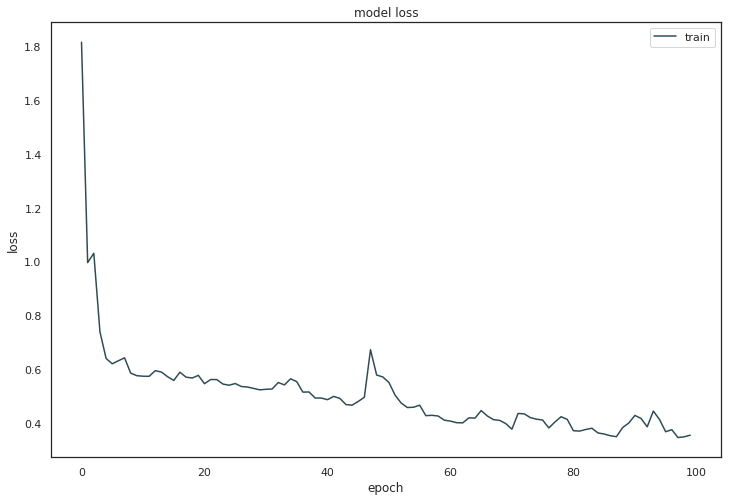

In [39]:
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
